# **Data Preprocessing**

### 1. Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### 2. Importing Dataset

In [ ]:
df=pd.read_csv("/content/fraudTest.csv")

### 3. Dataset Overview

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,553574
1,2145


In [ ]:
df.shape

(555719, 23)

### 4. Removing Irrelevant Features

In [ ]:
df.columns.tolist()

['Unnamed: 0',
 'trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

Here, In the above columns, **Unnamed** column is nothing but the serial number and **trans_date_trans_time** column (transaction date and time) is being represented by **unix_time** column (transaction time in Unix format).

So, Both of them can be removed. (As Unnamed Column is Irrelevant and trans_date_trans_time column is redundant).

In [ ]:
df=df.drop(['Unnamed: 0','trans_date_trans_time'],axis=1)

In [ ]:
df.columns.tolist()

['cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

In [ ]:
df.shape

(555719, 21)

### 5. Handling Missing Values

In [ ]:
df.isnull().sum()

,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0
state,0


# **Exploratory Data Analysis**

### 1. Outlier Detection and Removal

In [ ]:
df.dtypes

,0
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object
city,object
state,object


Outliers can only be detected (or) removed for **numerical data**. So, Here, We only consider **cc_num, amt, zip, lat, long, city_pop, unix_time, merch_lat, merch_long, is_fraud** columns for detection and removal

In [ ]:
df.shape

(555719, 21)

In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,553574
1,2145


Here, Even though we encounter outliers in the columns. We remove less number (or) no outliers in order to maintain the number of 1's in the dataset. (If we remove all the outliers, the number of 1's in the dataset are getting reduced).

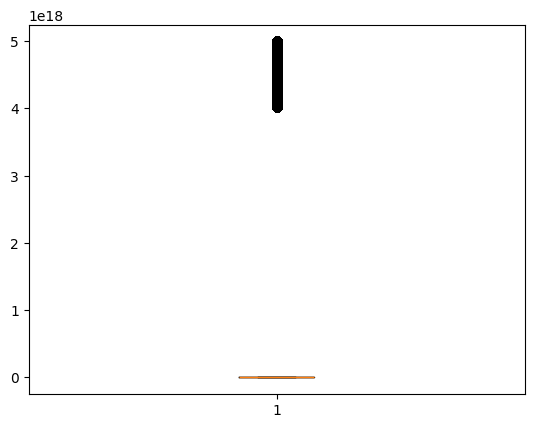

In [ ]:
plt.boxplot(df['cc_num'])
plt.show()

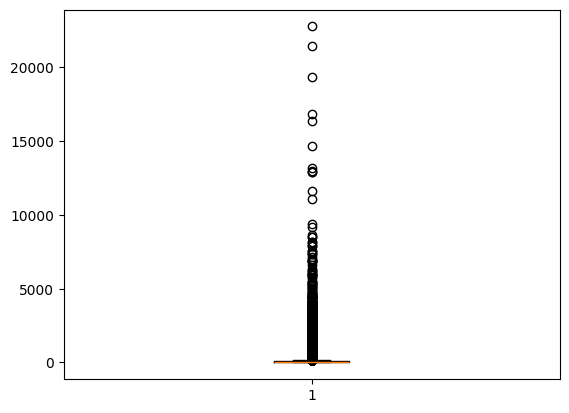

In [ ]:
plt.boxplot(df['amt'])
plt.show()

In [ ]:
df=df[df['amt']<1350]

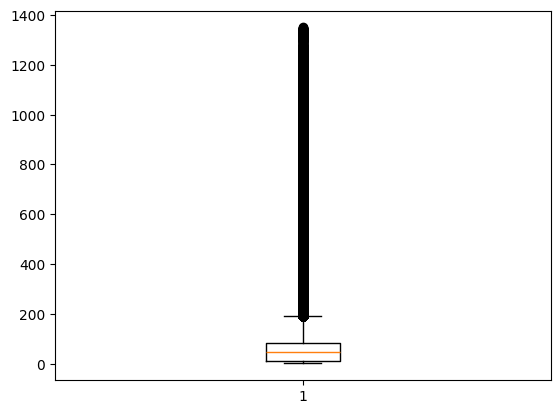

In [ ]:
plt.boxplot(df['amt'])
plt.show()

In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,552828
1,2145


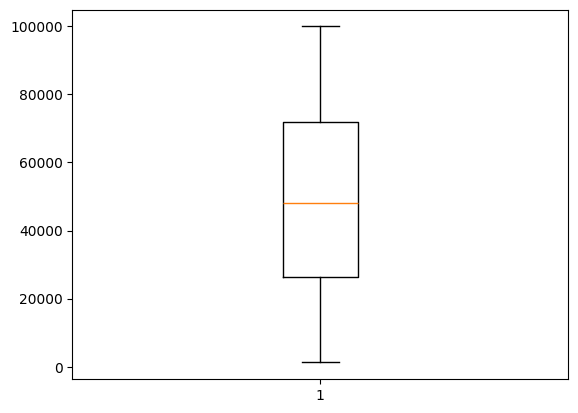

In [ ]:
plt.boxplot(df['zip'])
plt.show()

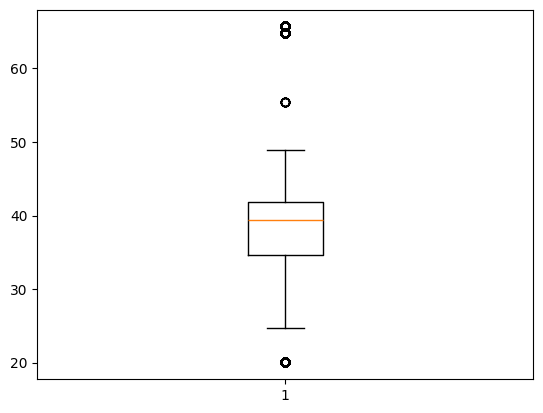

In [ ]:
plt.boxplot(df['lat'])
plt.show()

In [ ]:
df=df[(df['lat']>=20)&(df['lat']<=60)]

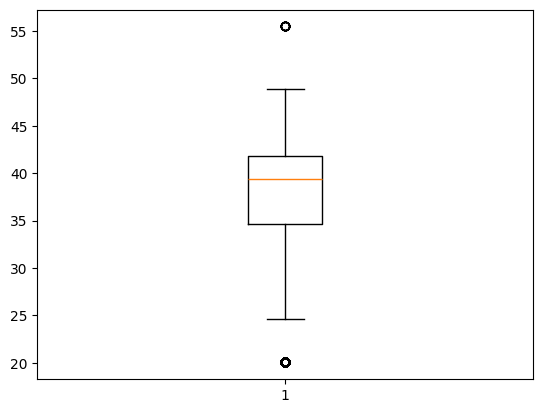

In [ ]:
plt.boxplot(df['lat'])
plt.show()

In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,552000
1,2145


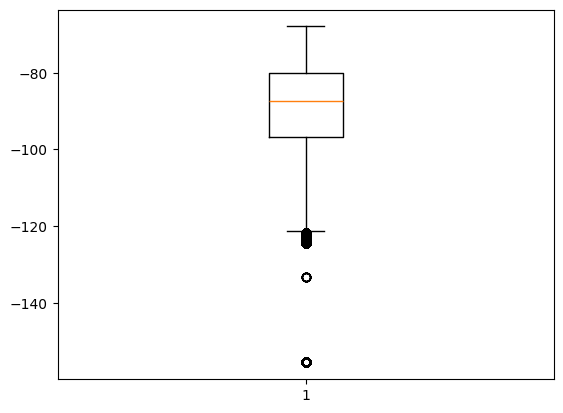

In [ ]:
plt.boxplot(df['long'])
plt.show()

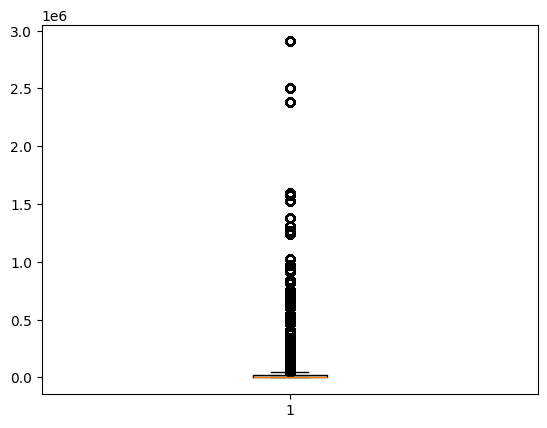

In [ ]:
plt.boxplot(df['city_pop'])
plt.show()

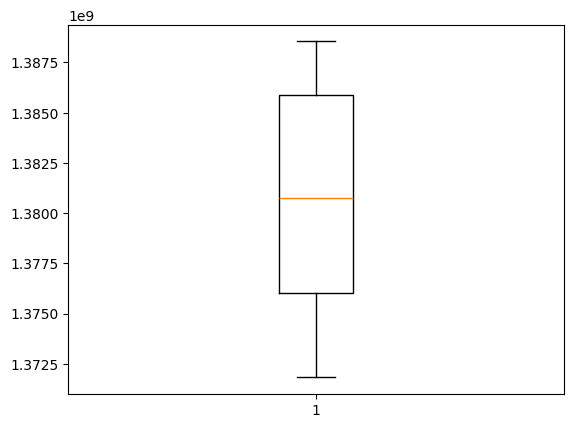

In [ ]:
plt.boxplot(df['unix_time'])
plt.show()

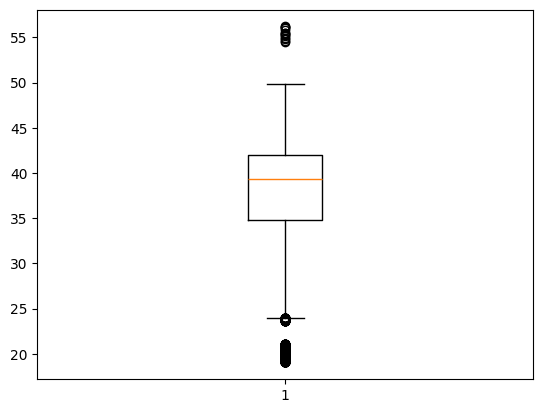

In [ ]:
plt.boxplot(df['merch_lat'])
plt.show()

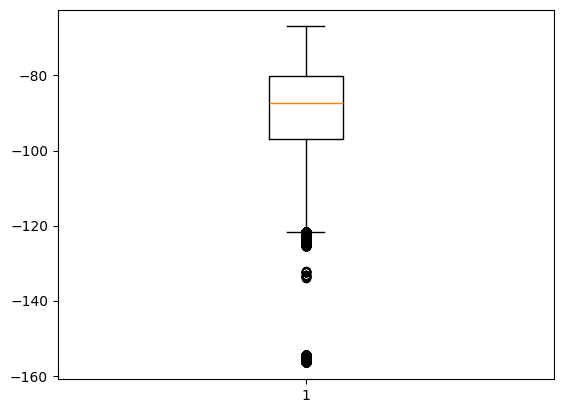

In [ ]:
plt.boxplot(df['merch_long'])
plt.show()

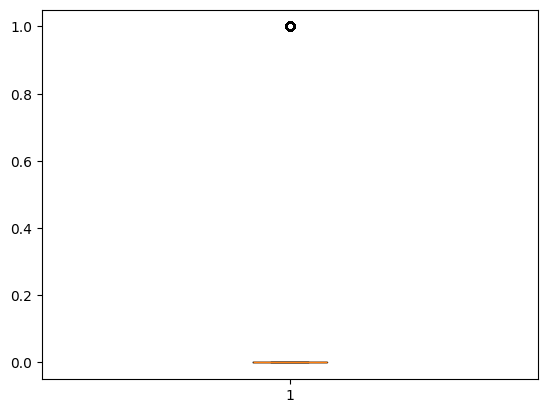

In [ ]:
plt.boxplot(df['is_fraud'])
plt.show()

In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,552000
1,2145


In [ ]:
df.shape

(554145, 21)

### 2. Transforming Categorical Values into Numericals - **Encoding**

In [ ]:
df.dtypes

,0
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object
city,object
state,object


In [ ]:
Encoder=LabelEncoder()
df['merchant']=Encoder.fit_transform(df['merchant'])
df['category']=Encoder.fit_transform(df['category'])
df['first']=Encoder.fit_transform(df['first'])
df['last']=Encoder.fit_transform(df['last'])
df['gender']=Encoder.fit_transform(df['gender'])
df['street']=Encoder.fit_transform(df['street'])
df['city']=Encoder.fit_transform(df['city'])
df['state']=Encoder.fit_transform(df['state'])
df['job']=Encoder.fit_transform(df['job'])
df['dob']=Encoder.fit_transform(df['dob'])
df['trans_num']=Encoder.fit_transform(df['trans_num'])

As, using Label Encoder for both the columns **merchant** and **category** leading to Ordinal Relationship among its values (assigning integers 0, 1, 2, etc... to categories, implicitly suggesting that one category is "greater than" another, which may not make sense for non-ordinal data), We are using Frequency Encoding for those 2 features

In [ ]:
df['merchant']=df['merchant'].map(df['merchant'].value_counts())
df['category']=df['category'].map(df['category'].value_counts())

In [ ]:
df.dtypes

,0
cc_num,int64
merchant,int64
category,int64
amt,float64
first,int64
last,int64
gender,int64
street,int64
city,int64
state,int64


### 3. Finding Correlation between Predictor Variables and the Target Variable - **Feature Selection (Filtering)**

In [ ]:
df.shape

(554145, 21)

In [ ]:
df.corr(numeric_only=True)['is_fraud'][:-1]

,is_fraud
cc_num,-0.001574
merchant,0.003061
category,0.001478
amt,0.304851
first,-0.001653
last,-0.001304
gender,0.000851
street,-0.001831
city,0.001878
state,-0.006267


Here, The features **amt, category, unix_time, dob, state, city_pop, lat, long, merch_lat, merch_long** are strongly correlated with the target variable (is_fraud). So, We are dropping the remaining features.

In [ ]:
df=df.drop(['cc_num','merchant','first','last','gender','street','city','zip','trans_num'],axis=1)

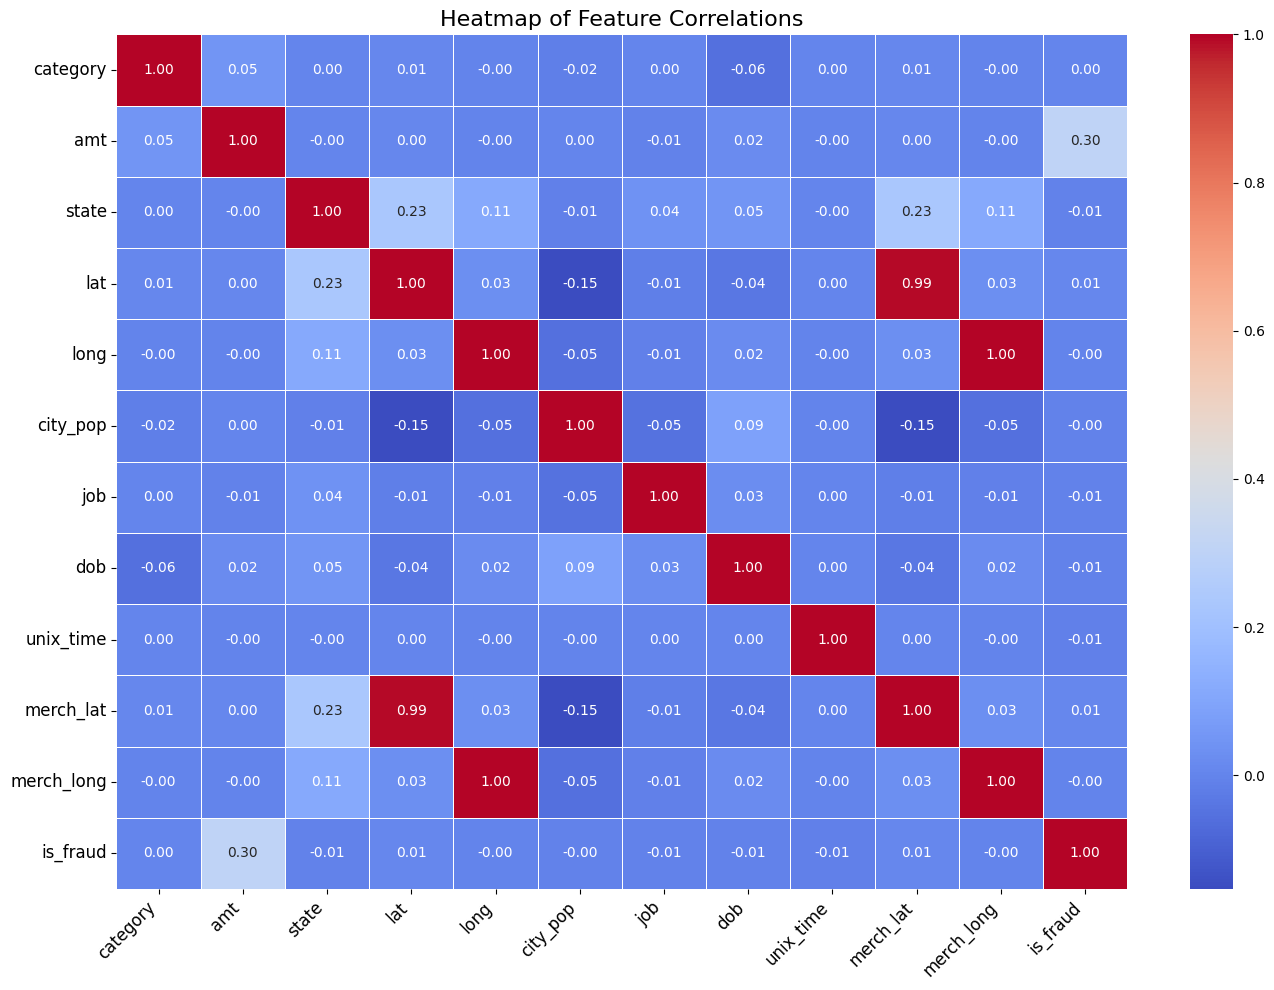

In [ ]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10},
)

plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

From this, We can observe that, **merch_lat, lat** and **merch_long, long** are having correlation of almost **1**. which means they both are representing the same information (redundant). Therefore, we can remove any one of them.

So, merch_lat, merch_long were removed

In [ ]:
df=df.drop(['merch_lat','merch_long'],axis=1)

In [ ]:
df.corr(numeric_only=True)['is_fraud'][:-1]

,is_fraud
category,0.001478
amt,0.304851
state,-0.006267
lat,0.006484
long,-0.001502
city_pop,-0.004937
job,-0.005196
dob,-0.008411
unix_time,-0.013086


In [ ]:
df.shape

(554145, 10)

# **Data Preparation**

### 1. Splitting the dataset into input - x and output - y

In [ ]:
x=df.drop('is_fraud',axis=1)
y=df['is_fraud']

In [ ]:
x

,category,amt,state,lat,long,city_pop,job,dob,unix_time
0,39268,2.86,39,33.9659,-80.9355,333497,274,374,1371816865
1,39268,29.84,43,40.3207,-110.4360,302,391,758,1371816873
2,36609,41.28,33,40.6729,-73.5365,34496,258,419,1371816893
3,34509,60.05,8,28.5697,-80.8191,54767,406,716,1371816915
4,17236,3.19,21,44.2529,-85.0170,1126,195,176,1371816917
...,...,...,...,...,...,...,...,...,...
555714,36609,43.77,23,40.4931,-91.8912,519,459,332,1388534347
555715,48617,111.84,42,29.0393,-95.4401,28739,197,888,1388534349
555716,48617,86.88,46,46.1966,-118.9017,3684,293,607,1388534355
555717,17236,7.99,12,44.6255,-116.4493,129,58,329,1388534364


In [ ]:
y

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
555714,0
555715,0
555716,0
555717,0


### 2. Splitting the data for training and testing

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train

,category,amt,state,lat,long,city_pop,job,dob,unix_time
333786,52467,125.60,4,41.6125,-122.5258,589,428,91,1382841575
62484,34509,15.98,8,28.1384,-80.6524,139650,112,196,1373681680
331649,40047,85.91,37,40.4679,-77.8967,1334,28,701,1382791472
233702,34509,4.44,44,36.9688,-78.5615,1970,144,676,1379095994
128332,52253,23.09,2,36.3924,-91.9932,1679,354,690,1375638267
...,...,...,...,...,...,...,...,...,...
110569,40047,3.57,30,40.4109,-74.2380,30770,129,810,1375101475
259915,34509,8.11,46,48.8878,-118.2105,149,413,557,1380066758
366880,48617,43.97,37,40.4603,-79.0097,922,130,460,1384087529
132309,49458,6.89,23,36.7651,-94.0492,760,349,674,1375792208


In [ ]:
y_train

,is_fraud
333786,0
62484,0
331649,0
233702,0
128332,0
...,...
110569,0
259915,0
366880,0
132309,0


In [ ]:
y_train.value_counts()

,count
is_fraud,
0,441636
1,1680


In [ ]:
x_test

,category,amt,state,lat,long,city_pop,job,dob,unix_time
478003,34509,101.82,27,46.1838,-101.2589,77,185,756,1387044736
445689,39268,11.26,42,33.0771,-99.9590,932,324,167,1386435325
28940,52467,94.36,42,29.3641,-98.4924,1595797,247,849,1372616553
418861,40047,354.72,33,42.6315,-75.1866,165,295,87,1385902331
160633,41505,3.40,33,44.6087,-74.9732,69,69,789,1376685103
...,...,...,...,...,...,...,...,...,...
142886,56246,37.48,23,38.6171,-90.4504,927396,301,242,1376126557
547863,41505,4.22,13,39.6704,-89.8588,1213,168,787,1388344432
454183,56246,62.17,4,34.0287,-118.4924,92043,80,253,1386547538
241907,41505,22.09,46,47.2271,-117.0819,895,86,880,1379354400


In [ ]:
y_test

,is_fraud
478003,0
445689,0
28940,0
418861,0
160633,0
...,...
142886,0
547863,0
454183,0
241907,0


# **Classification Model - Random Forest Classifier**

### 1. Model Training

In [ ]:
rfc=RandomForestClassifier(class_weight='balanced',random_state=42)
rfc.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

### 2. Model Evaluation

In [ ]:
y_pred=rfc.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

print("\nAccuracy:")
print(accuracy_score(y_test,y_pred))

print("\nPrecision:")
print(precision_score(y_test,y_pred))

print("\nRecall:")
print(recall_score(y_test,y_pred))

print("\nF1-Score:")
print(f1_score(y_test,y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[110336     28]
 [   154    311]]

Accuracy:
0.99835783053172

Precision:
0.9174041297935103

Recall:
0.6688172043010753

F1-Score:
0.7736318407960199

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110364
           1       0.92      0.67      0.77       465

    accuracy                           1.00    110829
   macro avg       0.96      0.83      0.89    110829
weighted avg       1.00      1.00      1.00    110829



### 3. Model Validation

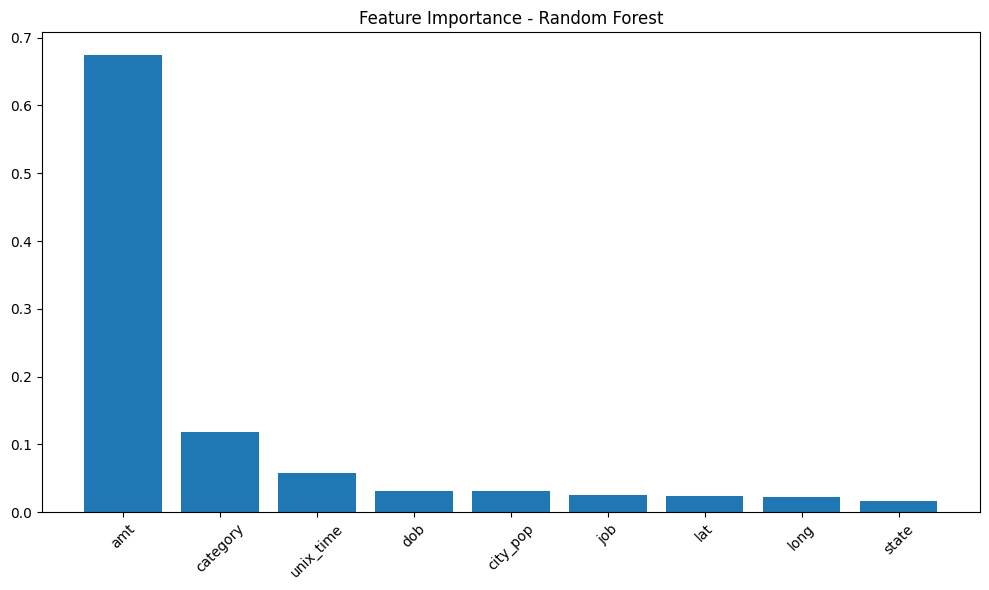

In [ ]:
important_features=rfc.feature_importances_
sorted_indices=np.argsort(important_features)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(important_features)),important_features[sorted_indices],align="center")
plt.xticks(range(len(important_features)),x.columns[sorted_indices],rotation=45)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

# **Regression Model - Gradient Boosting Regressor**

### 1. Model Training

In [ ]:
y_train

,is_fraud
333786,0
62484,0
331649,0
233702,0
128332,0
...,...
110569,0
259915,0
366880,0
132309,0


Here, **y_train** is a binary variable used to build Classification Model. But, In order to train our Regression Model, We need a continuous variable as output. So, We are generating it by using our Random Forest Classifier

In [ ]:
y_train_risk=rfc.predict_proba(x_train)[:,1]
y_train_risk

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(x_train,y_train_risk)

GradientBoostingRegressor(random_state=42)

### 2. Model Evaluation

In [ ]:
y_test

,is_fraud
478003,0
445689,0
28940,0
418861,0
160633,0
...,...
142886,0
547863,0
454183,0
241907,0


Same as y_train, y_test is also a binary variable. So, generating **y_test_risk**

In [ ]:
y_test_risk=rfc.predict_proba(x_test)[:,1]
y_test_risk

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_pred_risk=gbr.predict(x_test)

print("Regression Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_risk,y_pred_risk)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_risk,y_pred_risk)}")
print(f"R² Score: {r2_score(y_test_risk,y_pred_risk)}")

Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.0027858473752247984
Mean Squared Error (MSE): 0.00040492494941392457
R² Score: 0.8269344143830364


# **New Predictions**

In [ ]:
df[df['is_fraud']==1]

,category,amt,state,lat,long,city_pop,job,dob,unix_time,is_fraud
1685,36609,24.84,42,31.8599,-102.7413,23,109,398,1371852399,1
1767,27283,780.52,47,42.5545,-90.3508,1306,366,217,1371853942,1
1781,40047,620.33,47,42.5545,-90.3508,1306,366,217,1371854247,1
1784,41505,1077.69,17,30.4590,-90.9027,71335,213,830,1371854335,1
1857,49458,842.65,42,31.8599,-102.7413,23,109,398,1371855736,1
...,...,...,...,...,...,...,...,...,...,...
517197,49458,1041.51,24,34.6323,-89.8855,14462,112,222,1387749948,1
517274,49458,868.09,24,34.6323,-89.8855,14462,112,222,1387750687,1
517341,41505,1039.42,24,34.6323,-89.8855,14462,112,222,1387751508,1
517529,52467,289.27,24,34.6323,-89.8855,14462,112,222,1387753563,1


In [ ]:
# Example new data
x_new=np.array([[34509,101.82,27,46.1838,-101.2589,77,185,756,1387044736],[27283,766.38,24,34.6323,-89.8855,14462,112,222,1387754019]])

# Step 1: Predict probabilities using the RandomForestClassifier
y_new=rfc.predict(x_new)

# Step 2: Predict the final output using the GradientBoostingRegressor
y_new_risk_rfc=rfc.predict_proba(x_new)[:,1]
y_new_risk_gbr=gbr.predict(x_new)

print("Final Predictions:\n")
print("Class: ",y_new)
print("Probability by Random Forest: ",y_new_risk_rfc)
print("Risk by Gradient Booster: ",y_new_risk_gbr)

Final Predictions:

Class:  [0 1]
Probability by Random Forest:  [0.   0.59]
Risk by Gradient Booster:  [6.42140310e-05 2.76772973e-01]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
